# <font color='red'> Heart Failure Prediction

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The purpose of this Notebook is to develop a machine learning model in order to predict the heart failure probability, and for that we will use the dataset heart_failure_clinical_records_dataset.csv

Link : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

This dataset contains 12 features that can be used to predict mortality by heart failure.

### <font color='orange'>Essential libraries to work 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , f1_score,precision_score,recall_score,fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

### <font color='orange'>Data understanding

In [65]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [66]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [67]:
df.shape

(299, 13)

In [68]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [69]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [70]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [71]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


#### All formats and sizes are valid and the values are coherent

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [73]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [74]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### There is no Null value

### <font color='orange'>Data Preparation

#### The dataset is ready to use. We will just delete 'time' column because of its uselessness 

In [75]:
df=df.drop(['time'],axis=1)

In [76]:
df.shape

(299, 12)

### <font color='orange'>Data visualization and correlation analysis

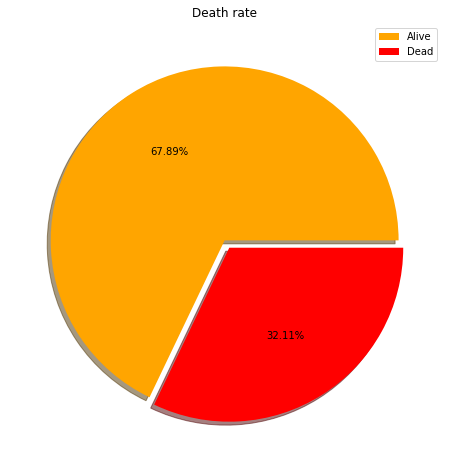

In [77]:
explode = (0,0.05)
plt.figure(figsize = (8,8))
plt.pie(df['DEATH_EVENT'].value_counts(),explode = explode,shadow = True,autopct='%1.2f%%',colors = ['orange','red'])
plt.legend(['Alive','Dead'])
plt.title('Death rate')
plt.show()

Text(0.5, 1.0, 'Death Probability based on smoking')

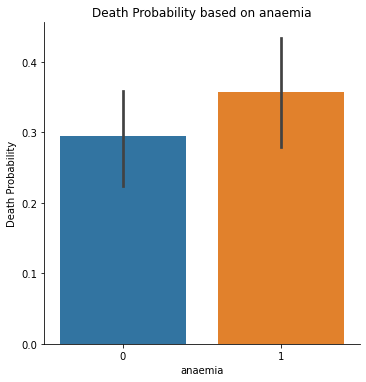

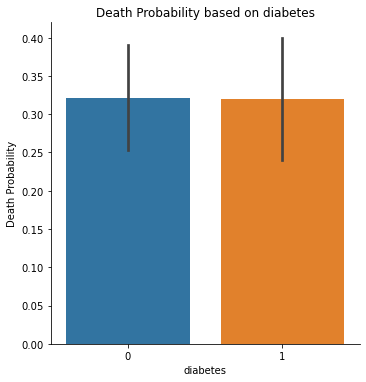

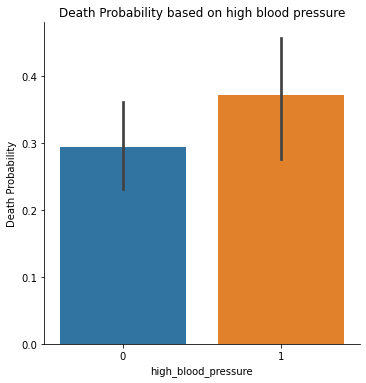

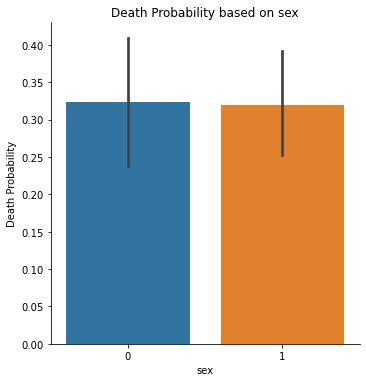

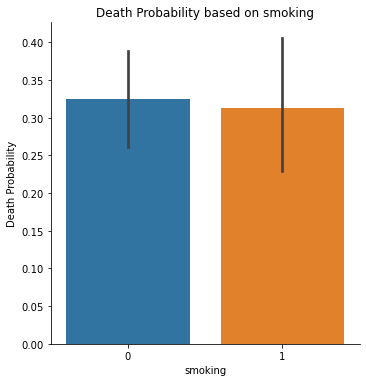

In [78]:
#Features with 2 values

g1=sns.catplot(x="anaemia", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['anaemia']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on anaemia')


g1=sns.catplot(x="diabetes", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['diabetes']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on diabetes')


g1=sns.catplot(x="high_blood_pressure", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['high_blood_pressure']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on high blood pressure')


g1=sns.catplot(x="sex", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['sex']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on sex')


g1=sns.catplot(x="smoking", y="DEATH_EVENT", data=df,kind="bar")
g1.set_ylabels("Death Probability")
df.groupby(['smoking']).agg({"DEATH_EVENT" : (np.sum)})
plt.title('Death Probability based on smoking')

Text(0.5, 1.0, 'Death Probability based on age')

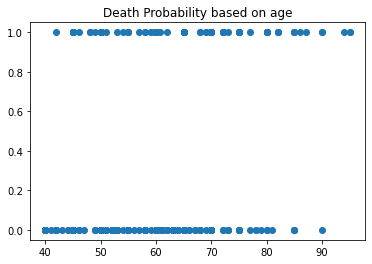

In [79]:
plt.scatter(df['age'],df['DEATH_EVENT'])
plt.title('Death Probability based on age')

Text(0.5, 1.0, 'Death Probability based on creatinine phosphokinase')

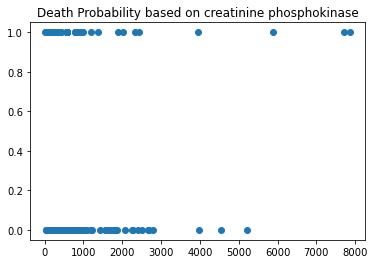

In [80]:
plt.scatter(df['creatinine_phosphokinase'],df['DEATH_EVENT'])
plt.title('Death Probability based on creatinine phosphokinase')

Text(0.5, 1.0, 'Death Probability based on ejection fraction')

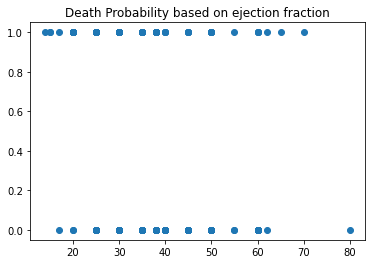

In [81]:
plt.scatter(df['ejection_fraction'],df['DEATH_EVENT'])
plt.title('Death Probability based on ejection fraction')

Text(0.5, 1.0, 'Death Probability based on platelets')

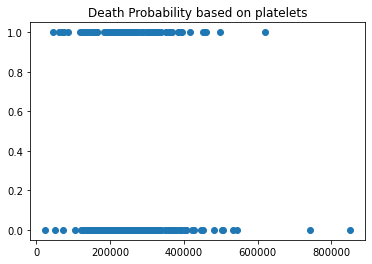

In [82]:
plt.scatter(df['platelets'],df['DEATH_EVENT'])
plt.title('Death Probability based on platelets')

Text(0.5, 1.0, 'Death Probability based on serum creatinine')

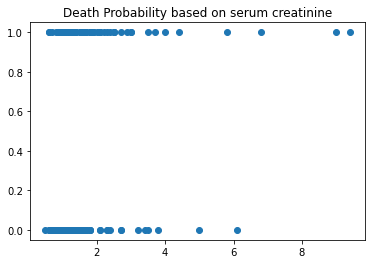

In [83]:
plt.scatter(df['serum_creatinine'],df['DEATH_EVENT'])
plt.title('Death Probability based on serum creatinine')

Text(0.5, 1.0, 'Death Probability based on serum sodium')

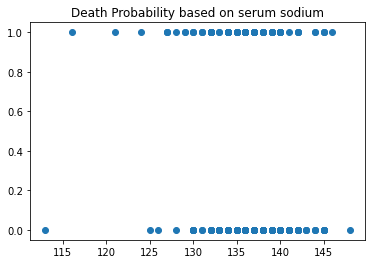

In [84]:
plt.scatter(df['serum_sodium'],df['DEATH_EVENT'])
plt.title('Death Probability based on serum sodium')

### <font color='green'>Correlation matrix

<AxesSubplot:>

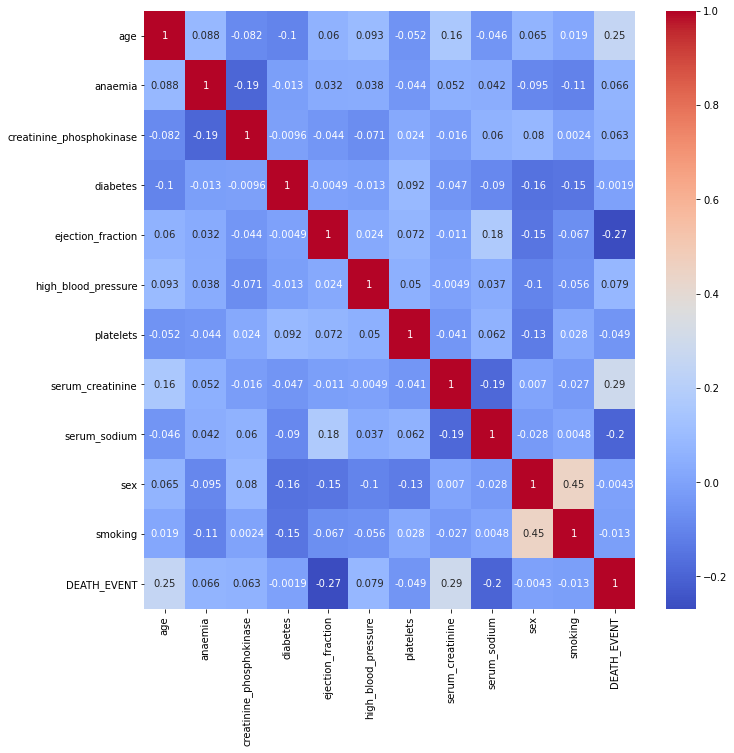

In [85]:
f, ax=plt.subplots(figsize=(11,11))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

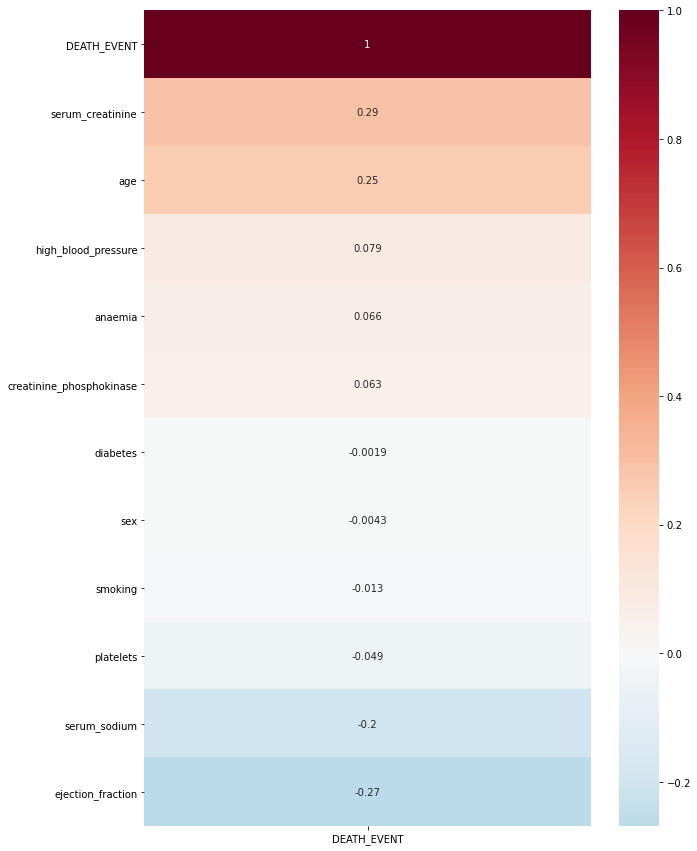

In [86]:
data=pd.get_dummies(df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking',
       'DEATH_EVENT']])
plt.figure(figsize=(10,15))
sns.heatmap(data.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT',ascending=False),cmap="RdBu_r",center=0.0, annot=True);

### <font color='orange'>Encoding and dividing


In [87]:
#Encoding
df=pd.get_dummies(df,drop_first=True)

#Dividing
#y is our target. Itrepresents the 'DEATH_EVENT' column
y=df['DEATH_EVENT']
#X is a dataframe of the other features 
X=df.drop(['DEATH_EVENT'],axis=1)
X.shape

(299, 11)

#### In machine learning, you should never evaluate the performance of your model on the same data that will be used to train it. So when we do machine learning we always divide our dataset in two parts. In general we put 80% of the data in the training part and 20% in the test part.

<img src="split.PNG">

#### To divide the dataset we import the function, then we create tables and we pass the data X and y in the function. We can also choose the percentage of data to put in each part.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

### <font color='orange'> Decision Tree Model

#### To avoid having a tree that is too long, complex and difficult to interpret, we need to set the hyperparameters of our model.

#### GridsearchCV allows us to find the best hyper-parameters for the model by comparing the different performances of each combination

In [89]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10),
             'max_leaf_nodes': [None, 3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
             }

grid = GridSearchCV(DecisionTreeClassifier(random_state=3), param_grid=param_grid, cv=10 )
grid.fit(X_train, y_train )
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': None}

In [90]:
DT = DecisionTreeClassifier(random_state=3, criterion='entropy', max_depth=4, max_leaf_nodes = None )
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

### <font color='green'>Decision Tree

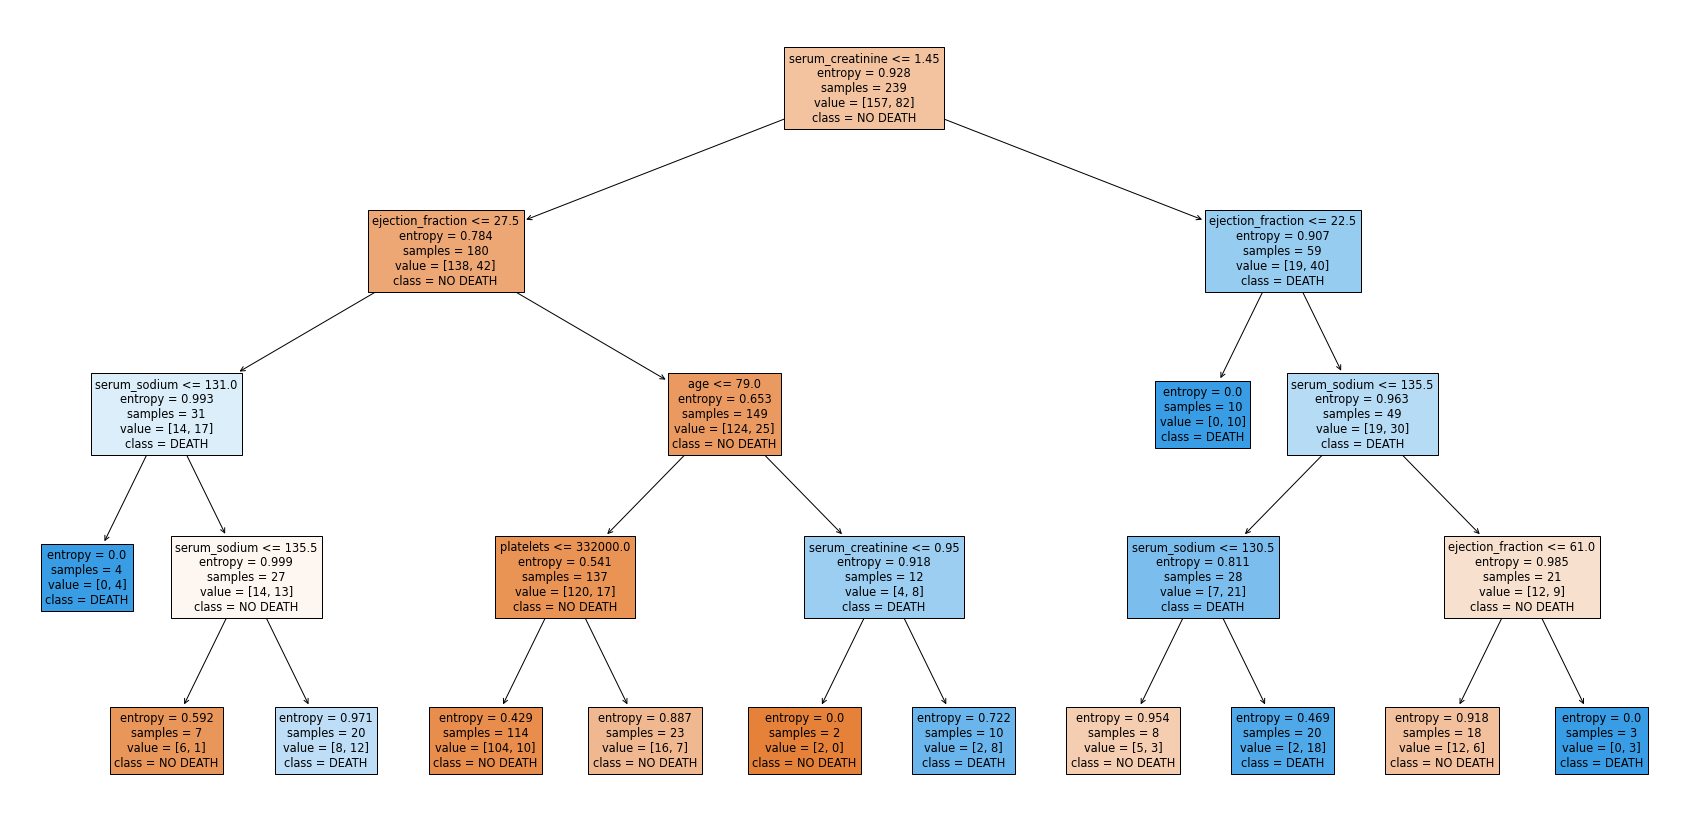

In [91]:
plt.figure(figsize=(30,15))
plot_tree(DT, feature_names= df.columns, class_names=['NO DEATH','DEATH'], filled=True)
plt.show()

In [92]:
featureList=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking' ]

In [93]:
print(export_text(DT, feature_names=featureList))

|--- serum_creatinine <= 1.45
|   |--- ejection_fraction <= 27.50
|   |   |--- serum_sodium <= 131.00
|   |   |   |--- class: 1
|   |   |--- serum_sodium >  131.00
|   |   |   |--- serum_sodium <= 135.50
|   |   |   |   |--- class: 0
|   |   |   |--- serum_sodium >  135.50
|   |   |   |   |--- class: 1
|   |--- ejection_fraction >  27.50
|   |   |--- age <= 79.00
|   |   |   |--- platelets <= 332000.00
|   |   |   |   |--- class: 0
|   |   |   |--- platelets >  332000.00
|   |   |   |   |--- class: 0
|   |   |--- age >  79.00
|   |   |   |--- serum_creatinine <= 0.95
|   |   |   |   |--- class: 0
|   |   |   |--- serum_creatinine >  0.95
|   |   |   |   |--- class: 1
|--- serum_creatinine >  1.45
|   |--- ejection_fraction <= 22.50
|   |   |--- class: 1
|   |--- ejection_fraction >  22.50
|   |   |--- serum_sodium <= 135.50
|   |   |   |--- serum_sodium <= 130.50
|   |   |   |   |--- class: 0
|   |   |   |--- serum_sodium >  130.50
|   |   |   |   |--- class: 1
|   |   |--- serum_sodiu

### <font color='green'>Feature importances

In [94]:
for var, importance in zip(featureList, DT.feature_importances_):
        print(var, importance)

age 0.13732856269940164
anaemia 0.0
creatinine_phosphokinase 0.0
diabetes 0.0
ejection_fraction 0.26659139054509084
high_blood_pressure 0.0
platelets 0.054937125458095856
serum_creatinine 0.3513408746885945
serum_sodium 0.18980204660881717
sex 0.0
smoking 0.0


Text(0.5, 1.0, 'Feature importances')

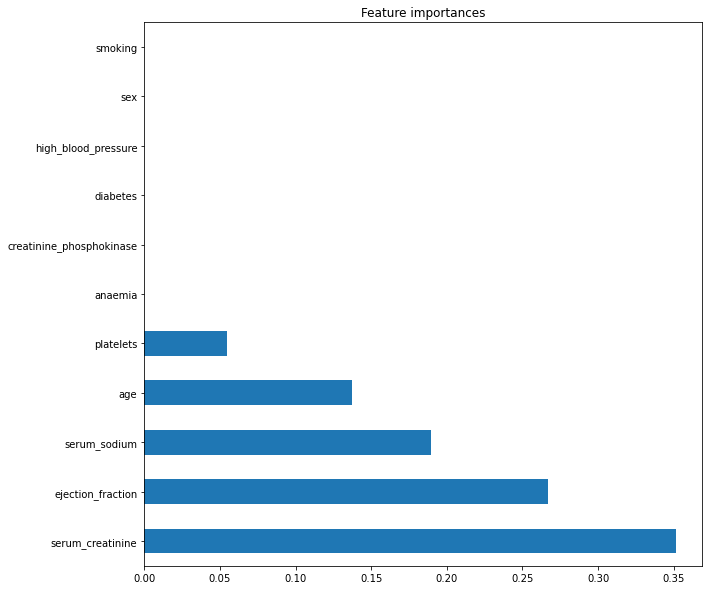

In [95]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

feat_importances = pd.Series(DT.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',ax=ax)

plt.title("Feature importances")

#### The impact of the attributes 'smoking', 'sex', 'high_blood_pressure', 'diabetes', 'creatinine_phosphokinase', 'anaemia' is not strong enough to take them into consideration. Thanks to GridSearchCV we know that doing the analysis on the attributes 'platelets', 'age', 'serum_sodium', 'ejection_fraction' and 'serum_creatinine' allows us to have the best accuracy possible

### <font color='green'>Results

In [96]:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
result=pd.DataFrame([['Decision Tree',acc,prec,rec,f1,f2]],columns=['Model','Accuracy', 'Precision', 'Recall', 'F1 Score','F2 Score'])
result

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
0,Decision Tree,0.816667,0.6,0.642857,0.62069,0.633803


              precision    recall  f1-score   support

           0   0.888889  0.869565  0.879121        46
           1   0.600000  0.642857  0.620690        14

    accuracy                       0.816667        60
   macro avg   0.744444  0.756211  0.749905        60
weighted avg   0.821481  0.816667  0.818820        60



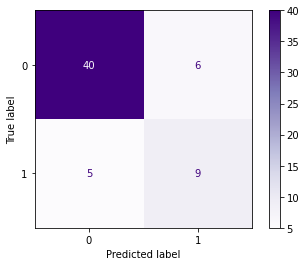

In [97]:

plot_confusion_matrix(DT,X_test,y_test,cmap="Purples")
y_pred=DT.predict(X_test)
print(classification_report(y_test, y_pred,digits=6))

In [98]:
print('Train score :', DT.score(X_train, y_train))
print('Test score :', DT.score(X_test, y_test))

Train score : 0.8368200836820083
Test score : 0.8166666666666667


### <font color='green'>Test

In [99]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [100]:
#First line
X_new=np.array([75.0, 0, 582, 0, 20, 1, 265000.0, 1.9, 130, 1, 0]).reshape(1,11)
print(DT.predict(X_new))

[1]


In [101]:
X_new=np.array([65.0, 1, 160, 1, 20, 0, 327000.0, 2.7, 116, 0, 0]).reshape(1,11)
print(DT.predict(X_new))

[1]


In [102]:
#Line 294
X_new=np.array([62.0, 0, 61, 1, 38, 1, 155000.0, 1.1, 143, 1, 1]).reshape(1,11)
print(DT.predict(X_new))

[0]


In [103]:
#Last line
X_new=np.array([50.0, 0, 196, 0, 45, 0, 395000.0, 1.6, 136, 1, 1]).reshape(1,11)
print(DT.predict(X_new))

[0]
